In [3]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt

In [34]:
train_dir = 'data'

os.listdir(train_dir)

['blank', 'fist', 'five', 'ok', 'thumbsdown', 'thumbsup']

In [16]:
#defining the directories for each set

train_blank_dir = os.path.join(base_dir,'blank')
train_fist_dir = os.path.join(base_dir,'fist')
train_five_dir = os.path.join(base_dir,'five')
train_ok_dir = os.path.join(base_dir,'ok')
train_thumbsdown_dir = os.path.join(base_dir,'thumbsdown')
train_thumbsup_dir = os.path.join(base_dir,'thumbsup')



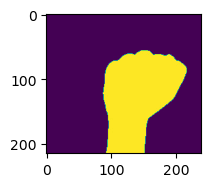

In [19]:
blank = plt.imread(os.path.join(train_fist_dir,os.listdir(train_fist_dir)[1]))
plt.rcParams['figure.figsize'] = [2, 2]
plt.imshow(blank)

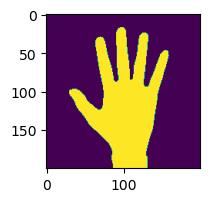

In [20]:
blank = plt.imread(os.path.join(train_five_dir,os.listdir(train_five_dir)[1]))
plt.rcParams['figure.figsize'] = [2, 2]
plt.imshow(blank)

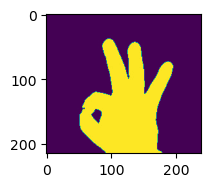

In [28]:
blank = plt.imread(os.path.join(train_ok_dir,os.listdir(train_ok_dir)[1]))
plt.rcParams['figure.figsize'] = [2, 2]
plt.imshow(blank)

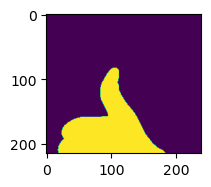

In [30]:
blank = plt.imread(os.path.join(train_thumbsup_dir,os.listdir(train_thumbsup_dir)[1]))
plt.rcParams['figure.figsize'] = [2, 2]
plt.imshow(blank)

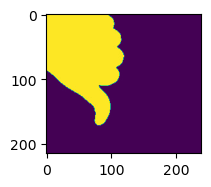

In [29]:
blank = plt.imread(os.path.join(train_thumbsdown_dir,os.listdir(train_thumbsdown_dir)[1]))
plt.rcParams['figure.figsize'] = [2, 2]
plt.imshow(blank)

In [49]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1/255,
                                  rotation_range = 40,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True,
                                  fill_mode = 'nearest')

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size = (215,215),
                                                   class_mode = 'categorical')

Found 10321 images belonging to 6 classes.


In [50]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',input_shape = (215,215,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.2),
    
    
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(6,activation='softmax')
])

model.compile(optimizer = 'adam',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [52]:
model.fit(train_generator,
         epochs = 10,
         verbose=1)

Epoch 1/10
323/323 [==============================] - 318s 982ms/step - loss: 1.9699 - accuracy: 0.5097
Epoch 2/10
323/323 [==============================] - 239s 740ms/step - loss: 1.1324 - accuracy: 0.5734
Epoch 3/10
323/323 [==============================] - 235s 728ms/step - loss: 1.1033 - accuracy: 0.5985
Epoch 4/10
323/323 [==============================] - 244s 756ms/step - loss: 1.0726 - accuracy: 0.6163
Epoch 5/10
323/323 [==============================] - 252s 780ms/step - loss: 0.9372 - accuracy: 0.6277
Epoch 6/10
323/323 [==============================] - 249s 771ms/step - loss: 0.9377 - accuracy: 0.6589
Epoch 7/10
323/323 [==============================] - 252s 779ms/step - loss: 0.8446 - accuracy: 0.6666
Epoch 8/10
323/323 [==============================] - 252s 779ms/step - loss: 0.8322 - accuracy: 0.6582
Epoch 9/10
323/323 [==============================] - 251s 775ms/step - loss: 0.8441 - accuracy: 0.6679
Epoch 10/10
323/323 [==============================] - 249s 770m

In [53]:
model.summary('hand')